In [266]:
import numpy as np
from matplotlib import pyplot as plt


def plot_empty_point(x, y, color):
    plt.plot(x, y, marker="o", color=color, markerfacecolor="white")
def plot_full_point(x, y, color):
    plt.plot(x, y, marker="o", color=color)
def plot_discontinuity(x, y0, y1):
    plt.plot([x, x], [y0, y1], color="gray", linestyle="dotted")

In [267]:
# Example 1

def plot_func_example_1(i=0, n=1000, color="red"):
    
    x0 = 2 * i * np.pi
    x1 = x0 + np.pi
    x2 = x1 + np.pi
    
    x = np.linspace(x0, x1, int(n/2))
    plt.plot(x, np.full_like(x, 1.0), color=color)
    
    x = np.linspace(x1, x2, int(n/2))
    plt.plot(x, np.zeros_like(x), color=color)
    
    plot_full_point(x0, 1.0, color)
    plot_full_point(x1, 0.0, color)
    
    plot_empty_point(x1, 1.0, color)
    plot_empty_point(x2, 0.0, color)
    
    offset = 0.1
    for x in [x0, x1, x2]:
        plot_discontinuity(x, -offset, 1.0 + offset)

def get_Fourier_coefficients_example_1(N=10):
    a0 = 1.0
    an = np.zeros(N, dtype=np.float64)
    bn = np.zeros(N, dtype=np.float64)
    
    ns = np.arange(1, N+1)
    bn[::2] = (2.0 / np.pi) / ns[::2]
    
    return a0, an, bn

def get_T_example_1():
    return 2.0 * np.pi



In [268]:
# Example 2

def plot_func_example_2(i=0, n=1000, color="red"):
    
    x0 = 2 * i * np.pi
    x1 = x0 + 2.0 * np.pi
    
    x = np.linspace(x0, x1, n)
    plt.plot(x, np.linspace(0, 2.0*np.pi, n), color=color)
    
    plot_full_point(x0, 0.0, color)
    plot_empty_point(x1, 2.0*np.pi, color)
    
    offset = 0.25
    for x in [x0, x1]:
        plot_discontinuity(x, -offset, 2.0 * np.pi + offset)

    
def get_Fourier_coefficients_example_2(N=10):
    a0 = 2.0 * np.pi
    an = np.zeros(N, dtype=np.float64)

    ns = np.arange(1, N+1)
    bn = -2.0 / ns
    
    return a0, an, bn

def get_T_example_2():
    return 2.0 * np.pi



In [269]:
# Example 3 (just a modification of Example 1)


def plot_func_example_3(i=0, n=1000, color="red"):
    
    x0 = 2 * i * np.pi
    x1 = x0 + np.pi
    x2 = x1 + np.pi
    x3 = 0.5 * (x1 + x2)
    
    x = np.linspace(x0, x1, int(n/2))
    plt.plot(x, np.full_like(x, 1.0), color=color)
    
    x = np.linspace(x1, x2, int(n/2))
    plt.plot(x, np.zeros_like(x), color=color)
    
    plot_full_point(x0, 1.0, color)
    
    plot_empty_point(x1, 0.0, color)
    plot_empty_point(x1, 1.0, color)
    plot_full_point(x1, 1.2, color="blue")

    plot_empty_point(x2, 0.0, color)
    
    plot_empty_point(x3, 0.0, color)
    plot_full_point(x3, 0.25, color="blue")
    
    offset = 0.25 
    for x in [x0, x1, x2, x3]:
        plot_discontinuity(x, -offset, 1.0 + offset)

    
def get_Fourier_coefficients_example_3(N=10):
    return get_Fourier_coefficients_example_1()

def get_T_example_3():
    return get_T_example_1()



In [270]:
# Evaluate Fourier series.
def eval_Fourier(a0, an, bn, T, x):
    res = np.full_like(x, 0.5 * a0)
    
    for i in range(an.size):
        res += an[i] * np.cos((2.0 * np.pi * (i+1) / T) * x)
    for i in range(bn.size):
        res += bn[i] * np.sin((2.0 * np.pi * (i+1) / T) * x)
    
    return res
    

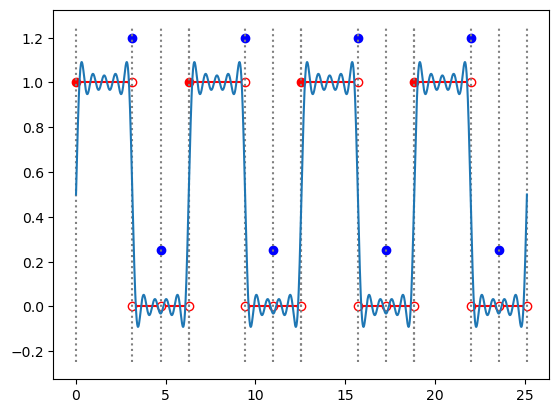

In [271]:
example = 3
nTs = 4
nvis_pts = 1000
N_fourier_coeffs = 50
plot_Fourier = True

if example == 1:
    T = get_T_example_1()
    func_plotter = plot_func_example_1
    get_coeffs = get_Fourier_coefficients_example_1
elif example == 2:
    T = get_T_example_2()
    func_plotter = plot_func_example_2
    get_coeffs = get_Fourier_coefficients_example_2
elif example == 3:
    T = get_T_example_3()
    func_plotter = plot_func_example_3
    get_coeffs = get_Fourier_coefficients_example_3
else:
    raise ValueError(f"Invalid example number {example}")


plt.figure()
for i in range(nTs):
    func_plotter(i=i, n=nvis_pts)
    
if plot_Fourier:
    a0, an, bn = get_coeffs(N=N_fourier_coeffs)
    x = np.linspace(0, nTs * T, nvis_pts * nTs)
    plt.plot(x, eval_Fourier(a0, an, bn, T, x))
